<a href="https://colab.research.google.com/github/JackJack94/Python-10/blob/main/Python%20Tugas%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
!ls

'Python Week 10'   Untitled


In [121]:
import os

import keras
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dropout, Activation, Dense
from keras.models import Sequential
from keras.optimizers import Adam

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from PIL import Image
from imutils import paths

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [122]:
print(keras.__version__)

2.4.3


In [123]:
base_dir = paths.list_images("/content/drive/MyDrive/Colab Notebooks/Python Week 10")
data = []
labels = []

In [124]:
for imagePath in base_dir:
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [125]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [126]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [127]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [128]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [131]:
base_model = MobileNet(weights='imagenet',include_top=False,input_shape=(128,128,3))
model = Sequential([base_model,  
                    GlobalAveragePooling2D(),                 
                    Dropout(0.5),
                    Dense(3, activation='softmax')])

In [132]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [133]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 3,210,051
Non-trainable params: 21,888
_________________________________________________________________


In [134]:
H = model.fit(trainX,
              trainY,
              validation_data=(testX, testY),
              steps_per_epoch=20,
              epochs=10,
              batch_size=16,
              verbose=1)

Epoch 1/10
20/20 [==============================] - 22s 1s/step - loss: 0.3008 - accuracy: 0.9000 - val_loss: 2.5120 - val_accuracy: 0.6624
Epoch 2/10
20/20 [==============================] - 22s 1s/step - loss: 0.4467 - accuracy: 0.9406 - val_loss: 2.9587 - val_accuracy: 0.6920
Epoch 3/10
20/20 [==============================] - 22s 1s/step - loss: 0.1876 - accuracy: 0.9453 - val_loss: 3.3370 - val_accuracy: 0.7046
Epoch 4/10
20/20 [==============================] - 22s 1s/step - loss: 0.0724 - accuracy: 0.9812 - val_loss: 0.5065 - val_accuracy: 0.9451
Epoch 5/10
20/20 [==============================] - 22s 1s/step - loss: 0.2240 - accuracy: 0.9711 - val_loss: 0.2739 - val_accuracy: 0.9451
Epoch 6/10
20/20 [==============================] - 22s 1s/step - loss: 0.1240 - accuracy: 0.9656 - val_loss: 0.2296 - val_accuracy: 0.9705
Epoch 7/10
20/20 [==============================] - 21s 1s/step - loss: 0.1699 - accuracy: 0.9614 - val_loss: 0.8696 - val_accuracy: 0.9114
Epoch 8/10
20/20 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


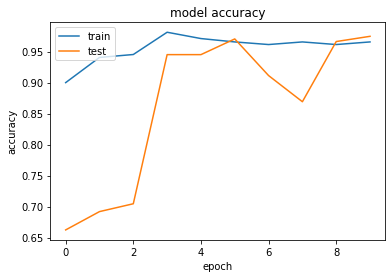

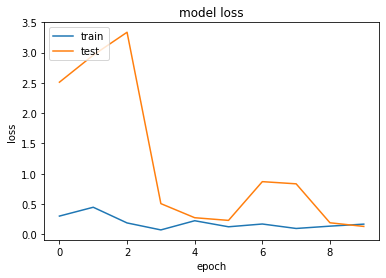

In [135]:
print(H.history.keys())

# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [136]:
# evaluate the network
predictions = model.predict(testX, batch_size=16)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

       coast       0.95      0.99      0.97        94
      forest       0.99      1.00      0.99        87
     highway       1.00      0.91      0.95        56

    accuracy                           0.97       237
   macro avg       0.98      0.97      0.97       237
weighted avg       0.98      0.97      0.97       237



In [137]:
sample='/content/drive/MyDrive/Colab Notebooks/Python Week 10/forest/forest_bost100.jpg'

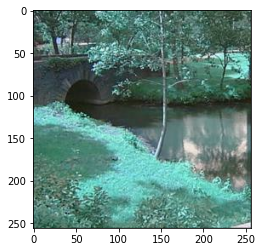

In [138]:
img_array = cv2.imread(sample)
plt.imshow(img_array)
plt.show()

In [140]:
image_testing = Image.open('/content/drive/MyDrive/Colab Notebooks/Python Week 10/forest/forest_bost100.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [142]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [143]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[7.4270805e-11 1.0000000e+00 1.1247932e-08]]
['forest']
